In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pengiens = pd.read_csv('../Datasets/penguins_size.csv')

In [7]:
pengiens.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
pengiens.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
pengiens = pengiens.dropna()

In [13]:
pengiens.sex.replace('.','FEMALE',inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14440\2006666197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pengiens.sex.replace('.','FEMALE',inplace=True)


In [14]:
pengiens.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

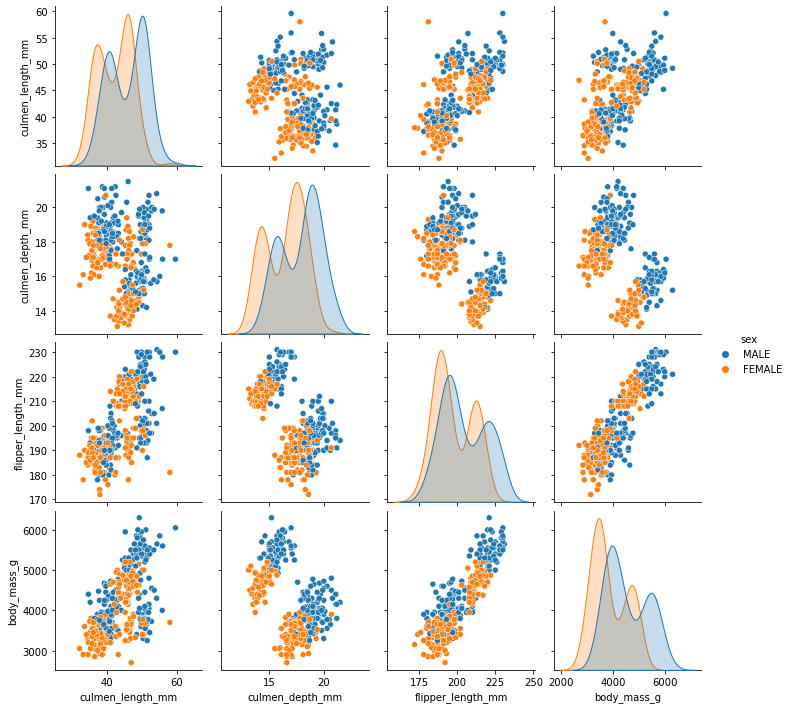

In [16]:
## #pairplot
sns.pairplot(pengiens,hue='sex',diag_kind='kde')

In [19]:
X = pd.get_dummies(pengiens.drop(columns='species',axis=1),drop_first=True)
y = pengiens['species']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=.25)

## #Random Forests Calssifiers(default hyperparameters)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(n_estimators=60)

In [55]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60)

In [56]:
y_pred = model.predict(X_test)

## #Model Evaluation

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [58]:
confusion_matrix(y_test,y_pred)

array([[17,  1,  0],
       [ 1,  9,  0],
       [ 0,  0, 13]], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        18
   Chinstrap       0.90      0.90      0.90        10
      Gentoo       1.00      1.00      1.00        13

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


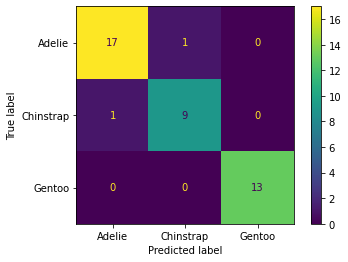

In [60]:
plot_confusion_matrix(model,X_test,y_test)

## #GridSearch for best model performance

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [38]:
param_grid = {'n_estimators':[80,100,120,150,200],
             'criterion':['gini','entorpy'],
             'max_features':['auto','sqrt','log2'],
             'bootstrap':['True','False'],
             'oob_score':['True','False']}

In [39]:
rand_forest = RandomForestClassifier()

In [40]:
grid_model = GridSearchCV(rand_forest,param_grid)

In [41]:
grid_model.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\lenovo\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lenovo\anaconda3\lib\site-pac

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entorpy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [80, 100, 120, 150, 200],
                         'oob_score': ['True', 'False']})

In [42]:
grid_model.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': 'True'}

In [44]:
grid_pred = grid_model.predict(X_test)

In [46]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        18
   Chinstrap       0.90      0.90      0.90        10
      Gentoo       1.00      1.00      1.00        13

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



## #Error plot based on n_estimator value

In [68]:
error = []

for i in range(1,40):
    model = RandomForestClassifier(n_estimators=i,max_features='auto',criterion='gini')
    model.fit(X_train,y_train)
    n_pred = model.predict(X_test)
    err = accuracy_score(y_test,n_pred)
    error.append(1-err)

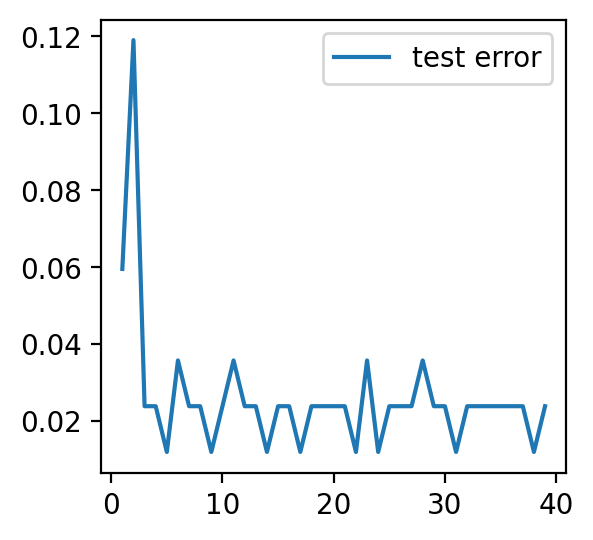

In [71]:
plt.figure(figsize=(3,3),dpi=200)
plt.plot(range(1,40),error,label='test error')
plt.legend()
plt.show()

In [73]:
grid_model.best_estimator_.oob_score_

0.9931740614334471

In [74]:
grid_model.best_estimator_.bootstrap

'True'